<center><img src="https://images.ctfassets.net/5ziapef3sqpv/3akekPLQi29VfkBmsp6WJ7/adb7e6ff448eb2127bc1aa7acd23d516/BrandAssets_Logos_01-Wordmark.jpeg?w=580&h=327&f=center&fit=fill" style="width: 800px;"/>)

# **Problem Statement**

### **Customer Behaviour and it’s prediction lies at the core of every Business Model. From Stock Exchange, e-Commerce and Automobile to even Presidential Elections, predictions serve a great purpose. Most of these predictions are based on the data available about a person’s activity either online or in-person.**

### **Recommendation Engines are the much needed manifestations of the desired Predictability of User Activity..**

### **Recommendation Engines move one step further and not only give information but put forth strategies to further increase users interaction with the platform.**

### **In today’s world OTT platform and Streaming Services have taken up a big chunk in the Retail and Entertainment industry. Organizations like Netflix, Amazon etc. analyse User Activity Pattern’s and suggest products that better suit the user needs and choices.**

### **For the purpose of this Project we will be creating one such Recommendation Engine from the ground-up, where every single user, based on there area of interest and ratings, would be recommended a list of movies that are best suited for them.**

# **Dataset Information**

|Feature | Description|
|-----------|---------
|ID | Key for Cust and Movie|
|Rating| user rating for all movies|
|Genre|  movie category |
|Movie Name| name of movie wrt movie id| |

## **Data Pre-Processing**

### **Importing Libraires**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# **Loading DataSet**

In [2]:
# Reading dataset file
netflix_dataset = pd.read_csv(r'C:\Users\amitm\Desktop\Data Science and AI\ML\Project\Netflix\dataset\combined_data_1.txt\combined_data_1.txt',header = None, names = ['Cust_Id', 'Rating'], usecols = [0,1])

In [3]:
netflix_dataset

,Cust_Id,Rating
0,1:,NaN
1,1488844,3.0
2,822109,5.0
3,885013,4.0
4,30878,4.0
...,...,...
24058258,2591364,2.0
24058259,1791000,2.0
24058260,512536,5.0
24058261,988963,3.0


# **Data Cleaning**

In [4]:
#To print the datatype of columns
netflix_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24058263 entries, 0 to 24058262
Data columns (total 2 columns):
 #   Column   Dtype  
---  ------   -----  
 0   Cust_Id  object 
 1   Rating   float64
dtypes: float64(1), object(1)
memory usage: 367.1+ MB


In [5]:
#To inspect the shape of the datset
netflix_dataset.shape

(24058263, 2)

In [6]:
#To print the head of dataset
netflix_dataset.head()

,Cust_Id,Rating
0,1:,NaN
1,1488844,3.0
2,822109,5.0
3,885013,4.0
4,30878,4.0


In [7]:
# To chenck Null values into DataSet
netflix_dataset.isnull().sum()

Cust_Id       0
Rating     4499
dtype: int64

In [8]:
#Get the movie count ( as the NaN values in Rating column will show how many movie are there )
movie_count=netflix_dataset.isnull().sum()
movie_count=movie_count['Rating']
movie_count

4499

In [9]:
#Calculate the number of customers in the dataset
customer_count=netflix_dataset['Cust_Id'].nunique()
customer_count

475257

In [10]:
# Get the total number of customers that we have after removing movie id from the column
customer_count-movie_count

470758

In [11]:
#Get the total number of ratings given by the customers
rating_count=netflix_dataset['Cust_Id'].count() 
rating_count - movie_count  # In Customer id column we will remove movie id to get how many total rating are there

24053764

In [12]:
#To find out how many people have rated the movies as 1, 2, 3, 4, 5 stars ratings to the movies
stars = netflix_dataset.groupby('Rating')['Rating'].agg(['count'])
stars

,count
Rating,
1.0,1118186
2.0,2439073
3.0,6904181
4.0,8085741
5.0,5506583


## Distribution of the ratings in as a bar plot

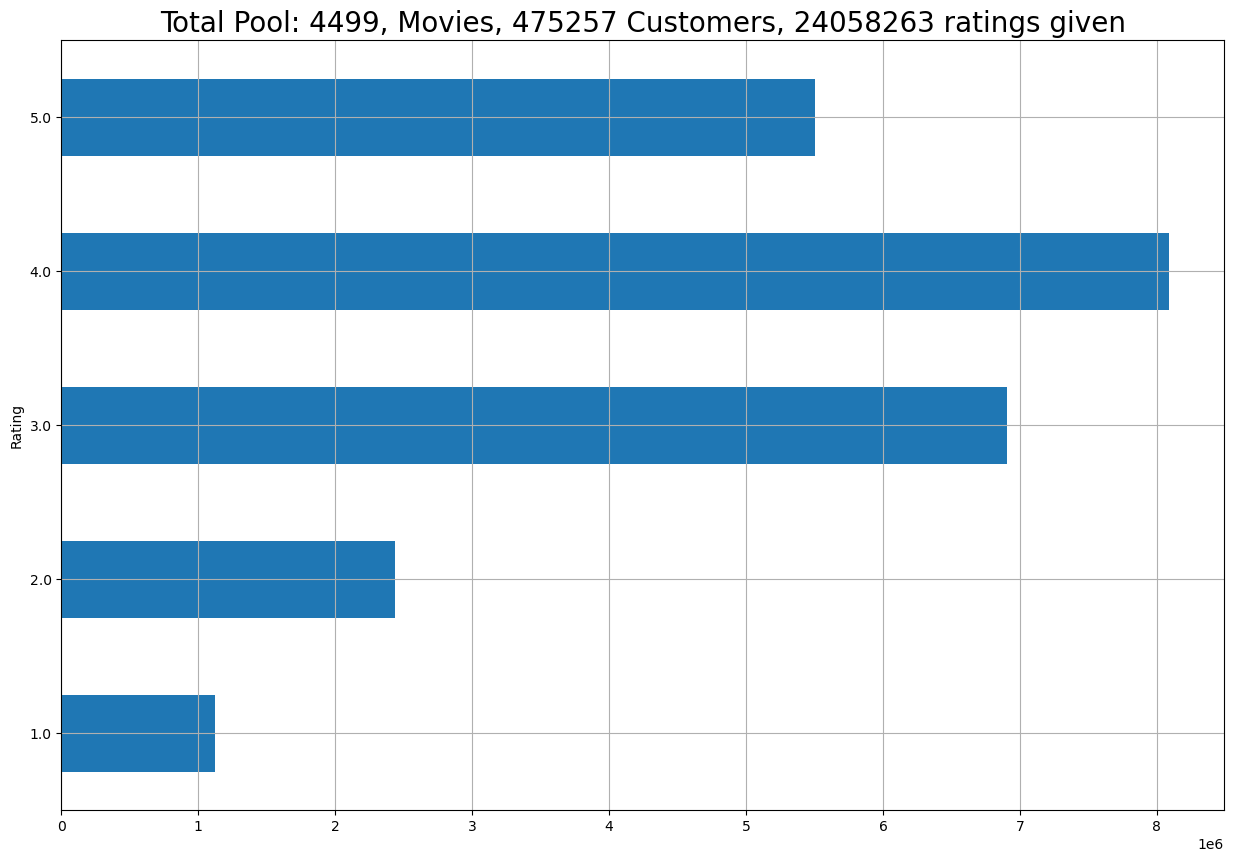

In [13]:
ax = stars.plot(kind = 'barh', legend = False, figsize=(15,10))
plt.title(f'Total Pool: {movie_count}, Movies, {customer_count} Customers, {rating_count} ratings given', fontsize =20)
plt.grid(True)

In [14]:
# Lets just make a clear dataframe to find how many Movie_Id are there
movie_id=None
movie_np=[]
# Iterate over the DataFrame rows
for cust_id in netflix_dataset['Cust_Id']:
    if ':' in cust_id:
      # Update the current movie ID
      movie_id = int(cust_id.replace(':', ''))
    movie_np.append(movie_id)

In [15]:
movie_np

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


In [16]:
# Add the new column to the DataFrame
netflix_dataset['Movie_Id'] = movie_np

In [17]:
netflix_dataset

,Cust_Id,Rating,Movie_Id
0,1:,NaN,1
1,1488844,3.0,1
2,822109,5.0,1
3,885013,4.0,1
4,30878,4.0,1
...,...,...,...
24058258,2591364,2.0,4499
24058259,1791000,2.0,4499
24058260,512536,5.0,4499
24058261,988963,3.0,4499


In [18]:
#Exclude rows where the 'Rating' is NaN and to keep those rows where 'Rating' column is not null
netflix_dataset = netflix_dataset[netflix_dataset['Rating'].notna()]
netflix_dataset

,Cust_Id,Rating,Movie_Id
1,1488844,3.0,1
2,822109,5.0,1
3,885013,4.0,1
4,30878,4.0,1
5,823519,3.0,1
...,...,...,...
24058258,2591364,2.0,4499
24058259,1791000,2.0,4499
24058260,512536,5.0,4499
24058261,988963,3.0,4499


In [19]:
netflix_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24053764 entries, 1 to 24058262
Data columns (total 3 columns):
 #   Column    Dtype  
---  ------    -----  
 0   Cust_Id   object 
 1   Rating    float64
 2   Movie_Id  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 734.1+ MB


In [20]:
#Convert Datatype of Cust_id
netflix_dataset['Cust_Id'] = netflix_dataset['Cust_Id'].astype(int)

In [21]:
netflix_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24053764 entries, 1 to 24058262
Data columns (total 3 columns):
 #   Column    Dtype  
---  ------    -----  
 0   Cust_Id   int32  
 1   Rating    float64
 2   Movie_Id  int64  
dtypes: float64(1), int32(1), int64(1)
memory usage: 642.3 MB


In [22]:
#pre-filtering
'''
Now we will remove all the users who have rated less movies and
also all those movies that has been rated less in numbers
'''

'\nNow we will remove all the users who have rated less movies and\nalso all those movies that has been rated less in numbers\n'

In [23]:
dataset_movie_summary = netflix_dataset.groupby('Movie_Id')['Rating'].agg(["count"])
dataset_movie_summary

,count
Movie_Id,
1,547
2,145
3,2012
4,142
5,1140
...,...
4495,614
4496,9519
4497,714


In [24]:
dataset_movie_summary_count = dataset_movie_summary.count()
dataset_movie_summary_count

count    4499
dtype: int64

In [25]:
# We will create a benchmark
movie_benchmark=round(dataset_movie_summary['count'].quantile(0.6),0)
movie_benchmark

908.0

In [26]:
drop_movie_list=dataset_movie_summary[dataset_movie_summary['count'] < movie_benchmark].index
drop_movie_list

Index([   1,    2,    4,    7,    9,   10,   11,   12,   13,   14,
       ...
       4480, 4481, 4486, 4487, 4491, 4494, 4495, 4497, 4498, 4499],
      dtype='int64', name='Movie_Id', length=2699)

In [27]:
len(drop_movie_list)

2699

In [28]:
movies_left = dataset_movie_summary_count-len(drop_movie_list)
movies_left

count    1800
dtype: int64

In [29]:
'''
Now we will remove all the users that are in-active

'''

'\nNow we will remove all the users that are in-active\n\n'

In [30]:
dataset_cust_summary=netflix_dataset.groupby('Cust_Id')['Rating'].agg(["count"])
dataset_cust_summary

,count
Cust_Id,
6,153
7,195
8,21
10,49
25,4
...,...
2649404,12
2649409,10
2649421,3


In [31]:
# We will create a benchmark
cust_benchmark=round(dataset_cust_summary['count'].quantile(0.6),0)
cust_benchmark

36.0

In [32]:
drop_cust_list=dataset_cust_summary[dataset_cust_summary['count']<cust_benchmark].index
drop_cust_list

Index([      8,      25,      33,      83,      94,     126,     130,     133,
           142,     149,
       ...
       2649337, 2649343, 2649351, 2649376, 2649379, 2649384, 2649401, 2649404,
       2649409, 2649421],
      dtype='int32', name='Cust_Id', length=282042)

In [33]:
len(drop_cust_list)

282042

In [34]:
netflix_dataset=netflix_dataset[~netflix_dataset['Movie_Id'].isin(drop_movie_list)]
netflix_dataset=netflix_dataset[~netflix_dataset['Cust_Id'].isin(drop_cust_list)]
print('After the triming, the shape is: {}'.format(netflix_dataset.shape))

After the triming, the shape is: (19695836, 3)


In [35]:
netflix_dataset

,Cust_Id,Rating,Movie_Id
696,712664,5.0,3
697,1331154,4.0,3
698,2632461,3.0,3
699,44937,5.0,3
700,656399,4.0,3
...,...,...,...
24056842,1055714,5.0,4496
24056843,2643029,4.0,4496
24056844,267802,4.0,4496
24056845,1559566,3.0,4496


# **Loading another Dataset**

In [36]:
#load our second dataset which contains the Movie Id, Movie name and Genre
df_title = pd.read_csv(r'C:\Users\amitm\Desktop\Data Science and AI\ML\Project\Netflix\dataset\netflix_titles-1.csv', encoding='ISO-8859-1')


In [37]:
df_title

,ID,Movie Name,Rating,Genre
0,s1,Dick Johnson Is Dead,PG-13,Documentaries
1,s2,Blood & Water,TV-MA,"International TV Shows, TV Dramas, TV Mysteries"
2,s3,Ganglands,TV-MA,"Crime TV Shows, International TV Shows, TV Act..."
3,s4,Jailbirds New Orleans,TV-MA,"Docuseries, Reality TV"
4,s5,Kota Factory,TV-MA,"International TV Shows, Romantic TV Shows, TV ..."
...,...,...,...,...
8802,s8803,Zodiac,R,"Cult Movies, Dramas, Thrillers"
8803,s8804,Zombie Dumb,TV-Y7,"Kids' TV, Korean TV Shows, TV Comedies"
8804,s8805,Zombieland,R,"Comedies, Horror Movies"
8805,s8806,Zoom,PG,"Children & Family Movies, Comedies"


In [38]:
# Extract only the numeric part
df_title['ID'] = df_title['ID'].apply(lambda x: ''.join(filter(str.isdigit, x)))

In [39]:
df_title

,ID,Movie Name,Rating,Genre
0,1,Dick Johnson Is Dead,PG-13,Documentaries
1,2,Blood & Water,TV-MA,"International TV Shows, TV Dramas, TV Mysteries"
2,3,Ganglands,TV-MA,"Crime TV Shows, International TV Shows, TV Act..."
3,4,Jailbirds New Orleans,TV-MA,"Docuseries, Reality TV"
4,5,Kota Factory,TV-MA,"International TV Shows, Romantic TV Shows, TV ..."
...,...,...,...,...
8802,8803,Zodiac,R,"Cult Movies, Dramas, Thrillers"
8803,8804,Zombie Dumb,TV-Y7,"Kids' TV, Korean TV Shows, TV Comedies"
8804,8805,Zombieland,R,"Comedies, Horror Movies"
8805,8806,Zoom,PG,"Children & Family Movies, Comedies"


In [40]:
df_title.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          8807 non-null   object
 1   Movie Name  8807 non-null   object
 2   Rating      8803 non-null   object
 3   Genre       8807 non-null   object
dtypes: object(4)
memory usage: 275.3+ KB


In [41]:
#Convert ID data Type to Integer
df_title['ID']=df_title['ID'].astype(int)

In [42]:
df_title.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          8807 non-null   int32 
 1   Movie Name  8807 non-null   object
 2   Rating      8803 non-null   object
 3   Genre       8807 non-null   object
dtypes: int32(1), object(3)
memory usage: 240.9+ KB


In [43]:
#df_title['Genre']=df_title['Genre'].str.split(',')
#df_title
df_title['Genre'] = df_title['Genre'].fillna('').str.split(',')
df_title


,ID,Movie Name,Rating,Genre
0,1,Dick Johnson Is Dead,PG-13,[Documentaries]
1,2,Blood & Water,TV-MA,"[International TV Shows, TV Dramas, TV Myste..."
2,3,Ganglands,TV-MA,"[Crime TV Shows, International TV Shows, TV ..."
3,4,Jailbirds New Orleans,TV-MA,"[Docuseries, Reality TV]"
4,5,Kota Factory,TV-MA,"[International TV Shows, Romantic TV Shows, ..."
...,...,...,...,...
8802,8803,Zodiac,R,"[Cult Movies, Dramas, Thrillers]"
8803,8804,Zombie Dumb,TV-Y7,"[Kids' TV, Korean TV Shows, TV Comedies]"
8804,8805,Zombieland,R,"[Comedies, Horror Movies]"
8805,8806,Zoom,PG,"[Children & Family Movies, Comedies]"


In [44]:
expanded_data=df_title.explode('Genre')
expanded_data

,ID,Movie Name,Rating,Genre
0,1,Dick Johnson Is Dead,PG-13,Documentaries
1,2,Blood & Water,TV-MA,International TV Shows
1,2,Blood & Water,TV-MA,TV Dramas
1,2,Blood & Water,TV-MA,TV Mysteries
2,3,Ganglands,TV-MA,Crime TV Shows
...,...,...,...,...
8805,8806,Zoom,PG,Children & Family Movies
8805,8806,Zoom,PG,Comedies
8806,8807,Zubaan,TV-14,Dramas
8806,8807,Zubaan,TV-14,International Movies


In [45]:
expanded_data.isnull().sum()

ID            0
Movie Name    0
Rating        6
Genre         0
dtype: int64

In [46]:
expanded_data.dropna(inplace=True)

In [47]:
expanded_data.isnull().sum()

ID            0
Movie Name    0
Rating        0
Genre         0
dtype: int64

In [48]:
expanded_data

,ID,Movie Name,Rating,Genre
0,1,Dick Johnson Is Dead,PG-13,Documentaries
1,2,Blood & Water,TV-MA,International TV Shows
1,2,Blood & Water,TV-MA,TV Dramas
1,2,Blood & Water,TV-MA,TV Mysteries
2,3,Ganglands,TV-MA,Crime TV Shows
...,...,...,...,...
8805,8806,Zoom,PG,Children & Family Movies
8805,8806,Zoom,PG,Comedies
8806,8807,Zubaan,TV-14,Dramas
8806,8807,Zubaan,TV-14,International Movies


In [49]:
# Checking the unique genres.
expanded_data['Genre'].unique()

array(['Documentaries', 'International TV Shows', ' TV Dramas',
       ' TV Mysteries', 'Crime TV Shows', ' International TV Shows',
       ' TV Action & Adventure', 'Docuseries', ' Reality TV',
       ' Romantic TV Shows', ' TV Comedies', 'TV Dramas', ' TV Horror',
       'Children & Family Movies', 'Dramas', ' Independent Movies',
       ' International Movies', 'British TV Shows', 'Comedies', ' Dramas',
       ' Docuseries', ' Comedies', ' Crime TV Shows', 'TV Comedies',
       ' Spanish-Language TV Shows', 'Thrillers', ' Romantic Movies',
       ' Music & Musicals', 'Horror Movies', ' Sci-Fi & Fantasy',
       ' TV Thrillers', "Kids' TV", ' Thrillers', 'Action & Adventure',
       ' TV Sci-Fi & Fantasy', ' Classic Movies', ' Horror Movies',
       ' Anime Features', 'Reality TV', ' Sports Movies', 'Anime Series',
       " Kids' TV", 'International Movies', ' Korean TV Shows',
       'Sci-Fi & Fantasy', ' Science & Nature TV', ' Teen TV Shows',
       ' Cult Movies', 'Classic Movies

In [50]:
#Rename column to Movie_Id from ID
expanded_data.rename(columns={'ID':'Movie_Id'},inplace=True)

In [51]:
#Drop Rating in expanded_data
expanded_data.drop(columns=['Rating'],axis=1,inplace=True)

In [52]:
# Merge both the netflix_dataset and expanded_data beased on Movie ID
merged_df=pd.merge(netflix_dataset,expanded_data,on='Movie_Id',how='inner')
merged_df.head()

,Cust_Id,Rating,Movie_Id,Movie Name,Genre
0,712664,5.0,3,Ganglands,Crime TV Shows
1,712664,5.0,3,Ganglands,International TV Shows
2,712664,5.0,3,Ganglands,TV Action & Adventure
3,1331154,4.0,3,Ganglands,Crime TV Shows
4,1331154,4.0,3,Ganglands,International TV Shows


In [53]:
merged_df

,Cust_Id,Rating,Movie_Id,Movie Name,Genre
0,712664,5.0,3,Ganglands,Crime TV Shows
1,712664,5.0,3,Ganglands,International TV Shows
2,712664,5.0,3,Ganglands,TV Action & Adventure
3,1331154,4.0,3,Ganglands,Crime TV Shows
4,1331154,4.0,3,Ganglands,International TV Shows
...,...,...,...,...,...
43994603,267802,4.0,4496,Marvel's Daredevil,TV Action & Adventure
43994604,1559566,3.0,4496,Marvel's Daredevil,Crime TV Shows
43994605,1559566,3.0,4496,Marvel's Daredevil,TV Action & Adventure
43994606,293198,3.0,4496,Marvel's Daredevil,Crime TV Shows


In [54]:
#Check duplicates on merged data
merged_df.duplicated().sum()

0

In [55]:
#Check null values again
merged_df.isnull().sum()

Cust_Id       0
Rating        0
Movie_Id      0
Movie Name    0
Genre         0
dtype: int64

In [56]:
merged_df.shape

(43994608, 5)

In [57]:
merged_df[merged_df['Movie Name']=='Marvel\'s Daredevil']

,Cust_Id,Rating,Movie_Id,Movie Name,Genre
43977632,364518,4.0,4496,Marvel's Daredevil,Crime TV Shows
43977633,364518,4.0,4496,Marvel's Daredevil,TV Action & Adventure
43977634,1392773,2.0,4496,Marvel's Daredevil,Crime TV Shows
43977635,1392773,2.0,4496,Marvel's Daredevil,TV Action & Adventure
43977636,1527030,4.0,4496,Marvel's Daredevil,Crime TV Shows
...,...,...,...,...,...
43994603,267802,4.0,4496,Marvel's Daredevil,TV Action & Adventure
43994604,1559566,3.0,4496,Marvel's Daredevil,Crime TV Shows
43994605,1559566,3.0,4496,Marvel's Daredevil,TV Action & Adventure
43994606,293198,3.0,4496,Marvel's Daredevil,Crime TV Shows


## **1. Find out the list of most popular and liked genre.**

#### **Most Popular Genres (by Rating Count)**

In [58]:
most_popular_genre = merged_df.groupby(by='Genre')['Rating'].count().sort_values(ascending=False).reset_index().head()
most_popular_genre

,Genre,Rating
0,International Movies,5630989
1,Dramas,3477051
2,Comedies,2291084
3,International TV Shows,2178951
4,TV Dramas,2058824


#### **Most Liked Genres (by Average Rating)**

In [59]:
# Calculate the average rating for each genre (most liked)
liked_genre = merged_df.groupby(by='Genre')['Rating'].mean().sort_values(ascending=False).reset_index().head()
liked_genre

,Genre,Rating
0,Children & Family Movies,4.258676
1,Independent Movies,4.238376
2,Kids' TV,4.033645
3,Anime Features,4.016683
4,Spanish-Language TV Shows,4.011515


## **3. Find what Genre Movies have received the best and worst ratings based on User Rating**

In [60]:
#Genre Movie received best ratings

best_genre_movie = liked_genre
best_genre_movie.head()

,Genre,Rating
0,Children & Family Movies,4.258676
1,Independent Movies,4.238376
2,Kids' TV,4.033645
3,Anime Features,4.016683
4,Spanish-Language TV Shows,4.011515


In [61]:
#Genre Movie received worst ratings

worst_genre_movie = merged_df.groupby(by='Genre')['Rating'].mean().sort_values(ascending=True).reset_index().head()
worst_genre_movie

,Genre,Rating
0,Sci-Fi & Fantasy,2.800197
1,Classic & Cult TV,3.072434
2,TV Shows,3.083241
3,Documentaries,3.129271
4,Classic & Cult TV,3.198025


## **2. Create Model that finds the best suited Movie for one user in every genre**

In [62]:
# We will remove all the movies with less ratings and Users that have given less ratings by setting benchmark.
df_movie_summary=merged_df.groupby('Movie_Id')['Rating'].agg(['count','mean'])
df_movie_summary

,count,mean
Movie_Id,,
3,5097,3.620954
5,2607,3.869965
6,2547,3.090695
8,33129,3.148691
16,5162,3.089888
...,...,...
4489,3702,3.493517
4490,17064,3.166198
4492,8207,2.650177


In [63]:
# We will create Benchmark for keeping movies that are being rated more than 70% of the time.
movie_benchmark=round(df_movie_summary['count'].quantile(0.7),0)
print(f"Movie Benchmark: {movie_benchmark}")

#Now we will create a list of Movie ID values where movies rating count is less than 1799.

drop_movie_list = df_movie_summary[df_movie_summary['count'] <  movie_benchmark].index
drop_movie_list

Movie Benchmark: 16297.0


Index([   3,    5,    6,   16,   17,   24,   25,   26,   32,   36,
       ...
       4468, 4474, 4478, 4482, 4483, 4484, 4485, 4489, 4492, 4493],
      dtype='int64', name='Movie_Id', length=1260)

In [64]:
# We will remove all the users who are in-active or given few ratings.

df_cust_summary = merged_df.groupby('Cust_Id') ['Rating'].agg(['count','mean'])
df_cust_summary

,count,mean
Cust_Id,,
6,333,3.345345
7,435,4.085057
10,109,3.348624
42,82,4.000000
59,111,3.981982
...,...,...
2649375,82,4.060976
2649378,159,3.226415
2649388,169,3.325444


In [65]:
#Now set the benchmark for in active customers.

cust_benchmark= round(df_cust_summary['count'].quantile(0.7),0)
print(f"Customer Benchmark: {cust_benchmark}", "\n")

Customer Benchmark: 256.0 



In [66]:
# Now create a list of 'Cust_Id" which has given rating below 256 are considered inactive.

drop_cust_list =  df_cust_summary[(df_cust_summary['count'] < cust_benchmark)].index
drop_cust_list

Index([     10,      42,      59,      87,     116,     131,     169,     183,
           192,     195,
       ...
       2649328, 2649331, 2649335, 2649336, 2649370, 2649375, 2649378, 2649388,
       2649426, 2649429],
      dtype='int32', name='Cust_Id', length=131808)

In [67]:
# Check the original shape of the data.
print("The original shape of DataFrame has: ", merged_df.shape, "shape")

The original shape of DataFrame has:  (43994608, 5) shape


In [68]:
# Now we will drop all the Movies and Customers that are below the benchmark.

merged_df = merged_df[~merged_df['Movie_Id'].isin(drop_movie_list)]  # '~' symbol will not include the true values coming from isin()

merged_df = merged_df[~merged_df['Cust_Id'].isin(drop_cust_list)]

print(f"After trimming the shape is: {merged_df.shape} ")

After trimming the shape is: (20148949, 5) 


In [69]:
merged_df.head()

,Cust_Id,Rating,Movie_Id,Movie Name,Genre
10260,785314,1.0,8,Sankofa,Dramas
10261,785314,1.0,8,Sankofa,Independent Movies
10262,785314,1.0,8,Sankofa,International Movies
10263,243963,3.0,8,Sankofa,Dramas
10264,243963,3.0,8,Sankofa,Independent Movies


# To install the scikit-surprise library for implementing SVD

### Run the following command to install surprise package

In [70]:
pip install scikit-surprise

In [71]:
#Import the libararies required for model building.
from scipy.sparse import csr_matrix
from surprise import Reader, Dataset, SVD
from surprise.model_selection import cross_validate,train_test_split

In [72]:
# To read the dataset for SVD algorithm
reader=Reader()

In [73]:
# This will creates a Surprise Dataset object ('surprise_data') containing the data from the DataFrame

surprise_data=Dataset.load_from_df(merged_df[['Cust_Id', 'Movie_Id', 'Rating']], reader)

In [74]:
# Creating an instance of the SVD algorithm
# This initializes the SVD algorithm, which will be used for collaborative filtering-based recommendation

svd=SVD()

# Performing cross-validation on the Surprise Dataset object (surprise_data) using the SVD algorithm
# This evaluates the performance of the SVD algorithm using 3-fold cross-validation
# 'RMSE' (Root Mean Squared Error) and 'MAE' (Mean Absolute Error) are the evaluation metrics used
# The 'cv' parameter specifies the number of folds for cross-validation, which is set to 3
# The 'verbose' parameter controls whether to print progress messages during cross-validation

cross_validate(svd,surprise_data,measures=['RMSE', 'MAE'], cv=3, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    0.6977  0.6982  0.6980  0.6980  0.0002  
MAE (testset)     0.5372  0.5375  0.5374  0.5374  0.0001  
Fit time          213.53  219.78  218.39  217.23  2.68    
Test time         119.30  99.49   98.90   105.90  9.48    


{'test_rmse': array([0.69774283, 0.69816876, 0.69796889]),
 'test_mae': array([0.53724006, 0.5374624 , 0.53735244]),
 'fit_time': (213.52823948860168, 219.7791929244995, 218.39371490478516),
 'test_time': (119.30170035362244, 99.49233484268188, 98.9012463092804)}

In [75]:
# So first we take user 712664 and we try to recommend some movies based on the 5 star rated movies.

user_712664= merged_df[(merged_df['Cust_Id']==712664) & (merged_df['Rating']==5)]
user_712664=user_712664.set_index('Movie_Id')

user_712664

,Cust_Id,Rating,Movie Name,Genre
Movie_Id,,,,
175,712664,5.0,Tears of the Sun,Action & Adventure
175,712664,5.0,Tears of the Sun,Dramas
199,712664,5.0,King of Boys: The Return of the King,Crime TV Shows
199,712664,5.0,King of Boys: The Return of the King,International TV Shows
199,712664,5.0,King of Boys: The Return of the King,TV Dramas
...,...,...,...,...
4384,712664,5.0,Nothing to Hide,Dramas
4384,712664,5.0,Nothing to Hide,International Movies
4392,712664,5.0,Halkaa,Comedies


In [76]:
# Using the build_full_trainset method of the Surprise Dataset object (surprise_data)
# This method constructs a training set from the entire input data, suitable for training a model

train_set=surprise_data.build_full_trainset()

# Fitting the SVD algorithm (svd) to the training set (train_set)
svd.fit(train_set)

# Create Model that finds the best suited Movie for one  user in every genre.

In [77]:
# Define a function to find the Top Movies for each User in every Genre.

def get_top_movies_per_genre(user_id, data ,algo):
    genres = data['Genre'].unique()
    top_movies = []
    
    # Get the set of movie IDs that the user has rated
    rated_movie_ids = set(data[data['Cust_Id'] == user_id]['Movie_Id'])
    avg_ratings = data.groupby('Movie_Id')['Rating'].mean().to_dict()
    
    for genre in genres:
        # Filter movies of the given genre
        genre_movie = data[data['Genre']==genre]['Movie_Id'].unique()
        
        # Using list comprehension to store only the movies that the user has not rated means not watched yet.
        unrated_genre_movies = [movie_id for movie_id in genre_movie if movie_id not in rated_movie_ids]
        
        # Predict ratings for the user for all movies in this genre.
        predictions = [algo.predict(user_id, movie_id) for movie_id in unrated_genre_movies]
        
        # Sort predictions by estimated score
        predictions.sort(key=lambda x: x.est, reverse=True)
        
        # Get top movies for this genre if there are predictions available.
        if predictions:
            # Select the top movie prediction
            top_movie = predictions[0]
            
            # Get the title of the top movie
            movie_title= data[data['Movie_Id']==top_movie.iid]['Movie Name'].iloc[0]

            avg_rating = avg_ratings.get(top_movie.iid, "No Rating")  # Get the average rating
            
            # Append top movie details to the list
            top_movies.append({'Movie_Id': top_movie.iid,
                               'Movie Name': movie_title,
                               'Rating': avg_rating,
                               'Genre': genre,
                               'Estimated Score': top_movie.est})
            
            
    return pd.DataFrame(top_movies)

In [78]:
import random

# Assuming 'merged_df' is your DataFrame and it has a 'user_id' column
user_ids = merged_df['Cust_Id'].unique()
User_Id = random.choice(user_ids)

# The function returns a DataFrame containing the top movies per genre based on estimated scores from the SVD algorithm
top_movies_per_genre = get_top_movies_per_genre(User_Id, merged_df, svd)

# Sorting the DataFrame by 'Estimated Score' column in descending order
top_movies_per_genre = top_movies_per_genre.sort_values(by='Estimated Score', ascending=False).reset_index(drop=True)

# Displaying the DataFrame containing the top movies per genre
print(f"\033[1m Best Suited Movie For {User_Id} In Every Genre: ")
top_movies_per_genre.head(50)

 Best Suited Movie For 2092273 In Every Genre: 


,Movie_Id,Movie Name,Rating,Genre,Estimated Score
0,872,Sardar Ka Grandson,4.165418,International Movies,5.000000
1,872,Sardar Ka Grandson,4.165418,Comedies,5.000000
2,872,Sardar Ka Grandson,4.165418,Dramas,5.000000
3,1466,The Haunted Hathaways,3.652474,Kids' TV,4.853684
4,1466,The Haunted Hathaways,3.652474,TV Comedies,4.853684
5,1466,The Haunted Hathaways,3.652474,TV Sci-Fi & Fantasy,4.853684
6,3226,Little Singham: Mahabali,4.046807,Comedies,4.752284
7,3226,Little Singham: Mahabali,4.046807,Children & Family Movies,4.752284
8,3315,100 Things to do Before High School,3.989196,Movies,4.751301
9,3290,Jeff Garlin: Our Man In Chicago,4.358111,Stand-Up Comedy,4.727156


# **The End**